The following description and data are taken from Kaggle:

Comcast is notorious for terrible customer service and despite repeated promises to improve, they continue to fall short. Only last month (October 2016) the FCC fined them a cool $2.3 million after receiving over 1000 consumer complaints. After dealing with their customer service for hours yesterday, I wanted to find out more about others' experiences.

This will serve as a repository of public customer complaints filed against Comcast as I scrape them from the web. The data should not only provide a fun source for analysis, but it will help to pin down just what is wrong with Comcast's customer service.

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import libraries

In [136]:
df=pd.read_csv("comcast_fcc_complaints_2015.csv")
#Reading the dataset in a dataframe using Pandas

In [137]:
df.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Description
0,250635,Comcast Cable Internet Speeds,4/22/2015,3:53:50 PM,Internet,Abingdon,Maryland,21009,Closed,No,I have been contacting Comcast Internet Techni...
1,223441,Payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Back in January 2015 I made 2 payments: One fo...
2,242732,Speed and Service,4/18/2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Our home is located at in Acworth Georgia 3010...
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Comcast in the Atlanta area has just put into ...
4,307175,Comcast not working and no service to boot,5/26/2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,I have been a customer of Comcast of some sort...


In [138]:
# number of customer complaints in total
len(df.index)

2225

Let's see what the distribution of complaints is by state:

In [139]:
bystate = df[['Ticket #', 'State']].groupby('State').size()
bystate

State
Alabama                  26
Arizona                  20
Arkansas                  6
California              220
Colorado                 80
Connecticut              12
Delaware                 12
District Of Columbia     16
District of Columbia      1
Florida                 240
Georgia                 289
Illinois                164
Indiana                  59
Iowa                      1
Kansas                    2
Kentucky                  7
Louisiana                13
Maine                     5
Maryland                 78
Massachusetts            61
Michigan                115
Minnesota                33
Mississippi              39
Missouri                  4
Montana                   1
Nevada                    1
New Hampshire            12
New Jersey               75
New Mexico               15
New York                  6
North Carolina            3
Ohio                      3
Oregon                   49
Pennsylvania            130
Rhode Island              1
South Carolina

We notice that Discrtict of Columbia appears twice, due to a typo. Let's fix that.

In [140]:
df.loc[df['State'] == 'District of Columbia']

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Description
2123,311271,Internet speed,5/28/2015,12:26:21 PM,Internet,Washington,District of Columbia,20018,Solved,Yes,MI am a comcast customer and believe strongly ...


In [141]:
df.loc[2123,'State']='District Of Columbia'
bystate = df[['Ticket #', 'State']].groupby('State').size()
bystate

State
Alabama                  26
Arizona                  20
Arkansas                  6
California              220
Colorado                 80
Connecticut              12
Delaware                 12
District Of Columbia     17
Florida                 240
Georgia                 289
Illinois                164
Indiana                  59
Iowa                      1
Kansas                    2
Kentucky                  7
Louisiana                13
Maine                     5
Maryland                 78
Massachusetts            61
Michigan                115
Minnesota                33
Mississippi              39
Missouri                  4
Montana                   1
Nevada                    1
New Hampshire            12
New Jersey               75
New Mexico               15
New York                  6
North Carolina            3
Ohio                      3
Oregon                   49
Pennsylvania            130
Rhode Island              1
South Carolina           18
Tennessee     

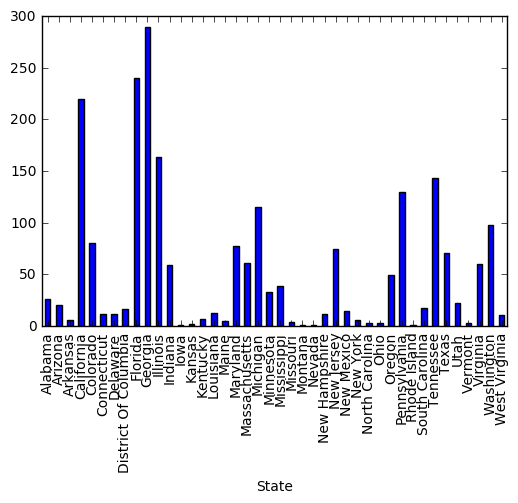

In [142]:
# let's plot the number of complaints by state
%matplotlib inline
bystate.plot(kind='bar')

In [150]:
# Let's see which states are overrepresented and which are underrepresented
# I create a csv file with state populations
pop=pd.read_csv("pop.csv")
states_sorted = pop.sort_values(['State', 'Population\nCensus Data: 2013'], ascending=[1, 0])
states_sorted.head()

,State,Population Census Data: 2013
22,Alabama,4833722
46,Alaska,735132
14,Arizona,6626624
31,Arkansas,2959373
0,California,38332521


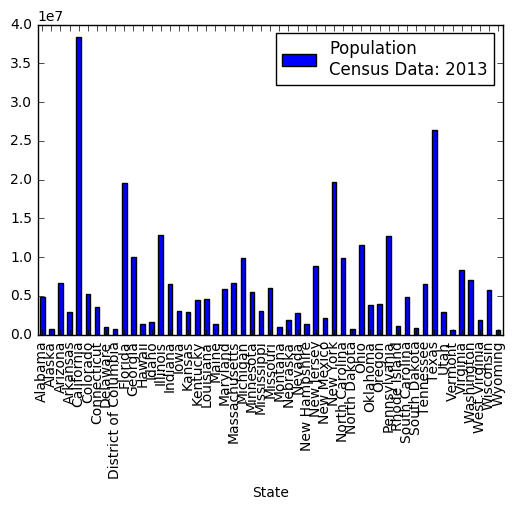

In [151]:
fig1=states_sorted.plot(x='State', y='Population\nCensus Data: 2013', kind='bar')

In [152]:
# Let's capitalize the O in Of Columbia, so it matches the convention in the other list.
states_sorted.loc[states_sorted['State'] == 'District of Columbia']

,State,Population Census Data: 2013
48,District of Columbia,646449


In [154]:
states_sorted.loc[48,'State'] = 'District Of Columbia'
states_sorted.loc[48]

State                            District Of Columbia
Population\nCensus Data: 2013                  646449
Name: 48, dtype: object

Let's compare:

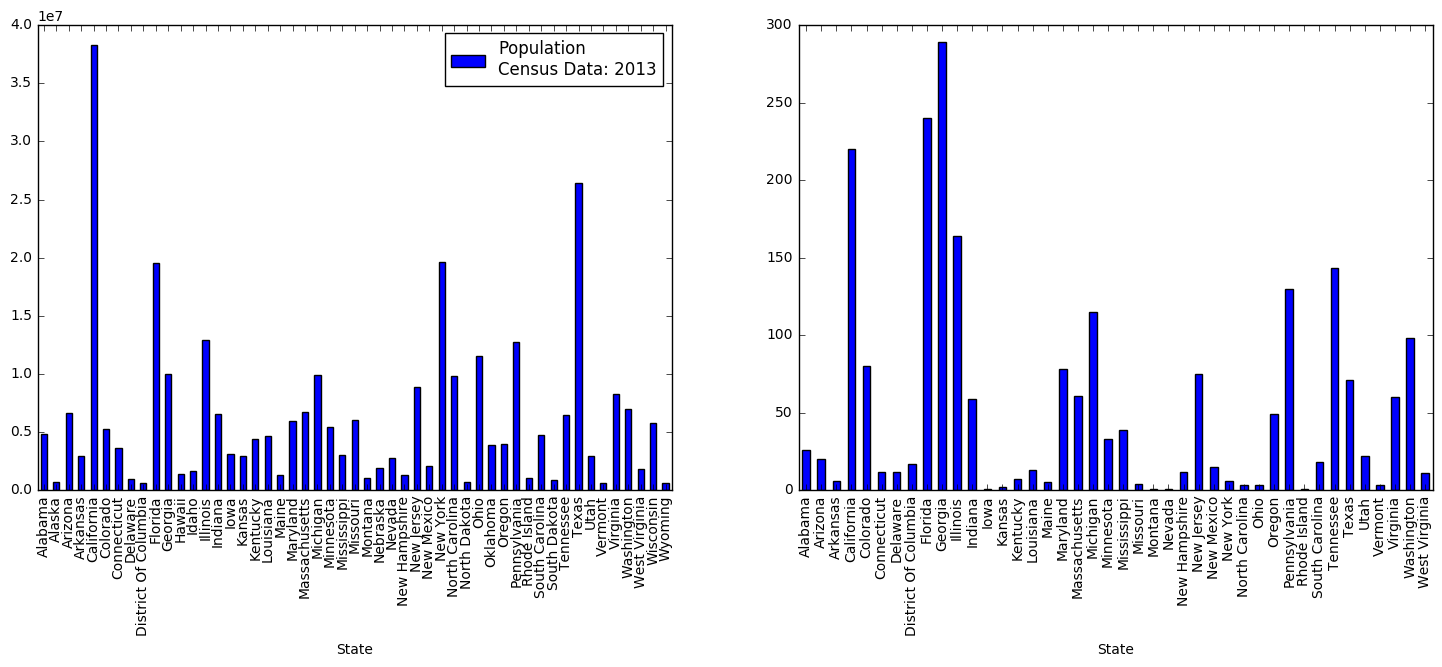

In [155]:
fig, axs = plt.subplots(1,2,figsize=(18, 6))
states_sorted.plot(x='State', y='Population\nCensus Data: 2013', kind='bar', ax=axs[0])
fig2=bystate.plot(kind='bar', ax=axs[1])

By comparing Florida and Georgia, we see that even though Georgia has a smaller population, it has a larger amount of complaints. Similarly, though Texas has a larger population than Tennessee, Tennessee has a much larger number of complaints. Let's see where the ratio complaints : population size is largest. This will be a problem area for Comcast; it will improve their reputation to understand what costumers are dissatisfied with in these areas.

In [203]:
states_sorted.loc[states_sorted['State']=='Alabama', 'Population\nCensus Data: 2013'].sum()

4833722

In [196]:
x=bla.groupby(by=['State'])['Population\nCensus Data: 2013'].sum()
x

State
Alabama    4833722
Name: Population\nCensus Data: 2013, dtype: int64

In [170]:
states_sorted['Population\nCensus Data: 2013']

22     4833722
46      735132
14     6626624
31     2959373
0     38332521
21     5268367
28     3596080
44      925749
48      646449
3     19552860
7      9992167
39     1404054
38     1612136
4     12882135
15     6570902
29     3090416
33     2893957
25     4395295
24     4625470
40     1328302
18     5928814
13     6692824
8      9895622
20     5420380
30     2991207
17     6044171
43     1015165
36     1868516
34     2790136
41     1323459
10     8899339
35     2085287
2     19651127
9      9848060
47      723393
6     11570808
27     3850568
26     3930065
5     12773801
42     1051511
23     4774839
45      844877
16     6495978
1     26448193
32     2900872
49      626630
11     8260405
12     6971406
37     1854304
19     5742713
50      582658
Name: Population\nCensus Data: 2013, dtype: int64

In [ ]:
states_sorted.loc[states_sorted['State']=='Alabama'].get_value(1,'Population\nCensus Data: 2013')

In [168]:
states_sorted['State']

22                 Alabama
46                  Alaska
14                 Arizona
31                Arkansas
0               California
21                Colorado
28             Connecticut
44                Delaware
48    District Of Columbia
3                  Florida
7                  Georgia
39                  Hawaii
38                   Idaho
4                 Illinois
15                 Indiana
29                    Iowa
33                  Kansas
25                Kentucky
24               Louisiana
40                   Maine
18                Maryland
13           Massachusetts
8                 Michigan
20               Minnesota
30             Mississippi
17                Missouri
43                 Montana
36                Nebraska
34                  Nevada
41           New Hampshire
10              New Jersey
35              New Mexico
2                 New York
9           North Carolina
47            North Dakota
6                     Ohio
27                Oklahoma
2

In [249]:
complaintspercapitabystate={};
for state in states_sorted['State']:
    if state in bystate:
        complaintspercapitabystate[state]=bystate[state]/states_sorted.loc[states_sorted['State']==state, 'Population\nCensus Data: 2013'].sum()
# we normalize these numbers by dividing by the minimum
minval = min(complaintspercapitabystate.values())
for key, value in complaintspercapitabystate.items():
    complaintspercapitabystate[key] = value / minval

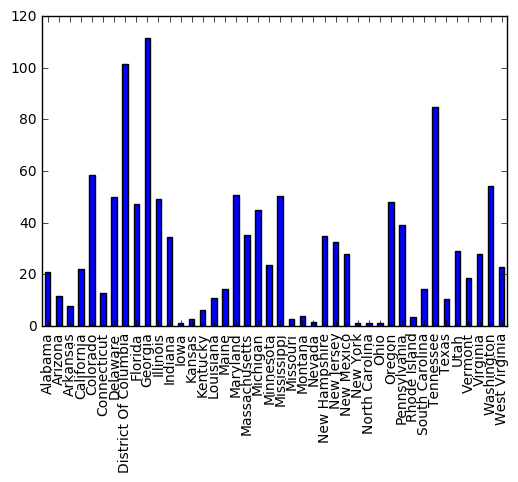

In [277]:
pd.Series(complaintspercapitabystate).plot.bar()

We have learned that the states that Comcast should work on its PR the most are: Georgia, District of Columbia and Tennesee.